# Survival Data on Titanic

1 Introduction  
1.1 Load and check data  
2 Missing values  
3 Prediction  
3.1 Split into training & test sets  
3.2 Building the model   
3.3 Prediction 

## 1. Introduction
This is my first notebook at Kaggle. Here I will be exploring the data set to see the survival on the Titanic. Work will be focused on some illustrative data visualization along the way. The project is trying to predict the survival on Titanic using the KNN, decission tree, logistic regression, SVM.

There are three parts to my script as follows:

Missing value imputation  
Analysis of Data  
Prediction

### **1.1 Load and check for data integrity**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 1000)

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn import metrics
%matplotlib inline

In [5]:
from scipy import stats
from statsmodels.stats.weightstats import ztest
import plotly.graph_objs as go
import plotly.express as px 
from itertools import cycle

**Loading the datasets**

In [6]:
dftrain=pd.read_csv("/kaggle/input/titanic/train.csv")
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
dftest=pd.read_csv("/kaggle/input/titanic/test.csv")
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
dftest.loc[dftest['Age'] < 18, "Age_category"]="Child"
dftest.loc[dftest['Age'] >=18, "Age_category"]="Adult"
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Adult
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Adult


## Missingness

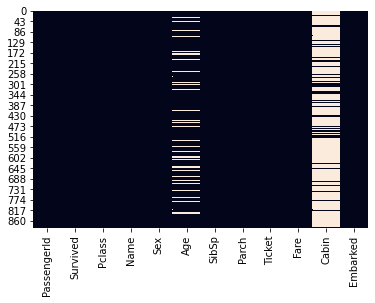

In [9]:
sns.heatmap(dftrain.isnull(), cbar=False)

The above heatmap shows the details about missng values in the data set

In [10]:
print("Nan values in PassengerId:",dftrain["PassengerId"].isnull().sum())
print("Nan values in Survived:", dftrain["Survived"].isnull().sum())
print ("Nan values in Pclass:", dftrain["Pclass"].isnull().sum())
print("Nan values in Name:",dftrain["Name"].isnull().sum())
print("Nan values in Sex:", dftrain["Sex"].isnull().sum())
print ("Nan values in Age:", dftrain["Age"].isnull().sum())
print("Nan values in SibSp:",dftrain["SibSp"].isnull().sum())
print("Nan values in Parch:", dftrain["Parch"].isnull().sum())
print ("Nan values in Ticket:", dftrain["Ticket"].isnull().sum())
print("Nan values in Fare:",dftrain["Fare"].isnull().sum())
print("Nan values in Cabin:", dftrain["Cabin"].isnull().sum())
print ("Nan values in Embarked:", dftrain["Embarked"].isnull().sum())

Nan values in PassengerId: 0
Nan values in Survived: 0
Nan values in Pclass: 0
Nan values in Name: 0
Nan values in Sex: 0
Nan values in Age: 177
Nan values in SibSp: 0
Nan values in Parch: 0
Nan values in Ticket: 0
Nan values in Fare: 0
Nan values in Cabin: 687
Nan values in Embarked: 2


This shows that there are only three columns Age, Cabin and Embarked has missing values.
* Age can be filled by a mean age value
* Cabin can be assumed as no cabin assigned
* It is assumed that values of the passesngers with the same fare and same class will have the same starting port.

In [11]:
mean=dftrain["Age"].mean()
dftrain["Age"].replace(np.nan,mean,inplace=True)

In [12]:
print("Nan values in Age:",dftrain["Age"].isnull().sum())

Nan values in Age: 0


Now checking the missing values in embarked column

In [13]:
em=pd.isnull(dftrain["Embarked"])
dftrain[em]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Two people from B28 cabin and paid 80 units as fare from class 1 with the ticket 113572 Embarked from a Nan value.

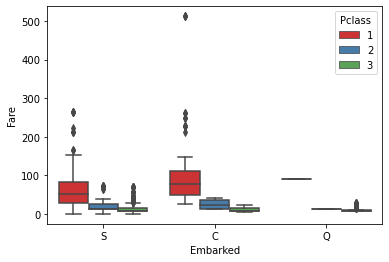

In [14]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=dftrain, palette="Set1")

The above plot infers that people from class 1 with fare range between 50-100 units, embarked from C. So C would be a good choice to replace NaN in embarked.

In [15]:
dftrain["Embarked"].replace(np.nan,'C',inplace=True)

In [16]:
print("Nan values in Embarked:",dftrain["Embarked"].isnull().sum())

Nan values in Embarked: 0


There are 687 passengers with missing cabin value, it is possible that everyone was not travelling with a cabin.

## Categorizing Age
* Passengers with age less than 18 are marked as Child * 
* Passengers with age 18 or more are marked as Adults * 

In [17]:
dftrain.loc[dftrain['Age'] < 18, "Age_category"]="Child"
dftrain.loc[dftrain['Age'] >=18, "Age_category"]="Adult"
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Adult


Number of adults and children who boarded the ship are as follows

In [18]:
dftrain["Age_category"].value_counts()

Adult    778
Child    113
Name: Age_category, dtype: int64

## Gender of Passengers

Finding the percentage of male and female on the ship

In [19]:
A=dftrain["Sex"].value_counts(normalize=True).rename_axis('Sex').reset_index(name='count')
A

,Sex,count
0,male,0.647587
1,female,0.352413


64% passengers were male

36% passengers were female

Bar graph for the same is as follows

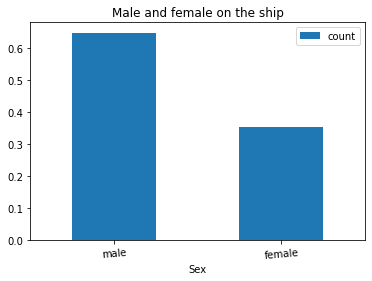

In [20]:
A.plot.bar(x="Sex", y="count", rot=5, title="Male and female on the ship")

plt.show(block=True)

This infers that most of the passengers were male

## Age group of passengers

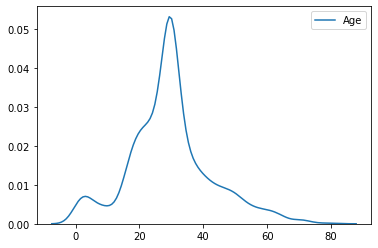

In [21]:
sns.kdeplot(dftrain['Age'])

The above graph shows that most of the passengers were in 20-40 age group

In [22]:
dftrain["Age_category"].value_counts(normalize=True)

Adult    0.873176
Child    0.126824
Name: Age_category, dtype: float64

87% of the passenger were Adult on the ship

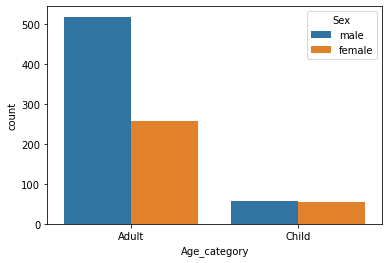

In [23]:
sns.countplot(x= 'Age_category', hue= 'Sex', data=dftrain)

In total Adult male passengers were higher than female adult passenger, while in child category its almost equal

## Capacity of all three class

In [24]:
B=dftrain["Pclass"].value_counts(normalize=True).rename_axis('Pclass').reset_index(name='count')
B

,Pclass,count
0,3,0.551066
1,1,0.242424
2,2,0.206510


55% of total passengers boarded the 3rd class

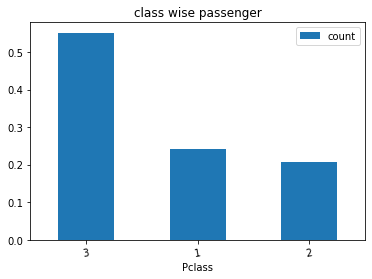

In [25]:
B.plot.bar(x="Pclass", y="count", rot=10, title="class wise passenger")

plt.show(block=True)

Most of the passenger were travelling in 3rd class

In [26]:
C = dftrain[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
C

,Sex,Survived
0,female,0.742038
1,male,0.188908


There were 74% women in all passengers who survived on the ship

## Fare paid by passengers

In [27]:
dftrain["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

1. From the above data we can infer an interesting thing i.e. there were people who didnt pay anything, they might be the staff of the ship or the children
2. Max fare was 512  
3. 50% paid 14 unit  
4. Avg fare was 32.2 units

In [28]:
f=dftrain.loc[dftrain["Fare"]==0]

In [29]:
f["Age_category"].value_counts(normalize=True)
f["Pclass"].value_counts(normalize=True)
f["Embarked"].value_counts(normalize=True)
f["Sex"].value_counts(normalize=True)
f["Survived"].value_counts()

0    14
1     1
Name: Survived, dtype: int64

The people who didnt pay the fare all were male adult and embarked from the same port "S" and were accomodated in different class, showing that those were staff from different rank and only one survived from them.

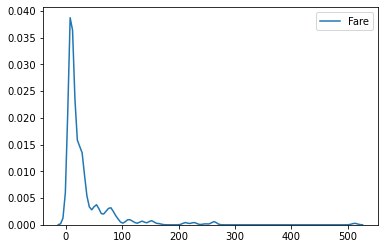

In [30]:
sns.kdeplot(dftrain['Fare'])

Most of the people paid 0-50 units for fare

## Survival data

Changing the datatype of Survived Column

In [31]:
dftrain["Survived"]= dftrain["Survived"].apply(str)     #changing Survived into str 

Replacing 1 with survived and 0 with dead

In [32]:
dftrain["Survived"] =dftrain["Survived"].replace(["1","0"],["survived", "dead"])
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,1,dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,dead,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


Counting dead and survived on the ship

In [33]:
D= dftrain["Survived"].value_counts(normalize=True).rename_axis('Survived').reset_index(name='count')
D

,Survived,count
0,dead,0.616162
1,survived,0.383838


Only 38.3% passengers survived on the ship

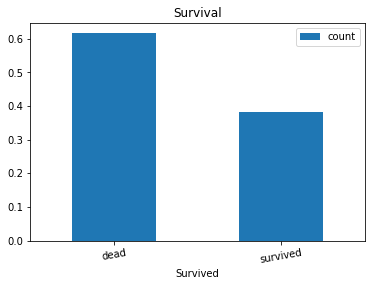

In [34]:
D.plot.bar(x="Survived", y="count", rot=10, title="Survival")

plt.show(block=True)

Less number of passengers were survived

## Gender wise survival

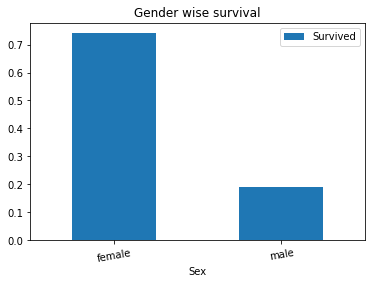

In [35]:
C.plot.bar(x="Sex", y="Survived", rot=10, title="Gender wise survival")

plt.show(block=True)

Female survival rate was more than 70%, says a priority was given to females at the time of evacuation

## Age groups wise survival

In [36]:
fig = px.histogram(dftrain, x='Age', color='Survived')
fig.show()

From the above graph its clear most of the people were young and in there 30's and survived

In [37]:
S=dftrain.loc[dftrain["Survived"]=="survived"]
S["Age_category"].value_counts(normalize=True)

Adult    0.821637
Child    0.178363
Name: Age_category, dtype: float64

In [38]:
age1=dftrain["Age_category"].value_counts().rename_axis('Age_category').reset_index(name='count')
age2=S["Age_category"].value_counts().rename_axis('Age_category').reset_index(name='countSV')
AC_survival= pd.merge(age1, age2)
AC_survival

,Age_category,count,countSV
0,Adult,778,281
1,Child,113,61


In [39]:
AC_survival['Percent'] = (AC_survival['countSV'] / 
                  AC_survival['count']) * 100
AC_survival

,Age_category,count,countSV,Percent
0,Adult,778,281,36.118252
1,Child,113,61,53.982301


Above data says 53% of total children survived, means evacuation team were trying to save children first

In [40]:
fig = px.histogram(dftrain, x='Age_category', color='Survived')
fig.show()

Most of the adult died in the disaster

## Gender wise survival

In [41]:
dftrain.groupby(['Sex'])['Survived'].value_counts(normalize=True)

Sex     Survived
female  survived    0.742038
        dead        0.257962
male    dead        0.811092
        survived    0.188908
Name: Survived, dtype: float64

We have seen that 74% female survived while only 18% male survived.

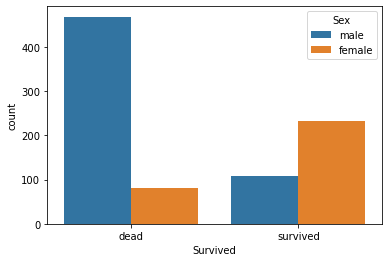

In [42]:
sns.countplot(x='Survived', hue='Sex', data=dftrain)

From the above graph it is clear that prefrence was given to female at the time of evacuation.

## Gender and Age role in evacuation

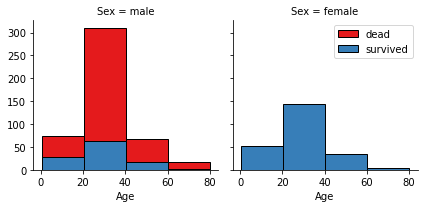

In [43]:
bins = np.linspace(dftrain.Age.min(), dftrain.Age.max(), 5)
g = sns.FacetGrid(dftrain, col="Sex", hue="Survived", palette="Set1",col_wrap=2) 
g.map(plt.hist, 'Age', bins=bins,ec="k")

g.axes[-1].legend()
plt.show()

Most of the passenger were in their 20-40, female of every age was the priority at the time of evacuation

## Fare wise survival

<function matplotlib.pyplot.show(*args, **kw)>

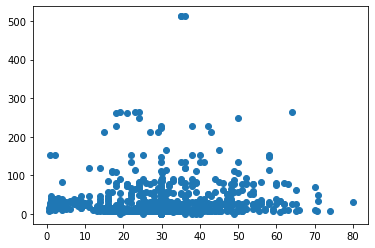

In [44]:
plt.scatter(dftrain["Age"],dftrain["Fare"])
plt.show

There were less people who paid high fare and very few paid more than 3 units.

In [45]:
dftrain[dftrain["Fare"]>=500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
258,259,survived,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Adult
679,680,survived,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Adult
737,738,survived,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Adult


3 passengers who paid more than 500 units for first class and survived as well were young in their 30's and it is clear from this class 1 was given the higher prefrence.

## Role of Embark

In [46]:
fig = px.histogram(dftrain, x='Embarked', color='Pclass')
fig.show()

Very few people embarked from Q, while S was marked with highest embarks.

## Class wise survival

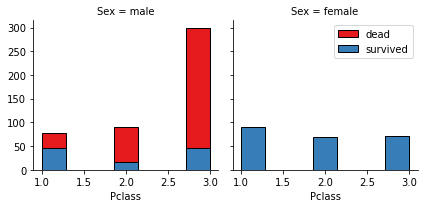

In [47]:
bins = np.linspace(dftrain.Pclass.min(), dftrain.Pclass.max(), 8)
g = sns.FacetGrid(dftrain, col="Sex", hue="Survived", palette="Set1",col_wrap=2) 
g.map(plt.hist, 'Pclass', bins=bins,ec="k")

g.axes[-1].legend()
plt.show()

Graph is showing that people from first class survived most

In [48]:
E=dftrain["Pclass"].value_counts().rename_axis('Pclass').reset_index(name='count').sort_values(by="Pclass")
F=S["Pclass"].value_counts().rename_axis('Pclass').reset_index(name='countSV').sort_values(by="Pclass")
Class_survival= pd.merge(E, F)
Class_survival

,Pclass,count,countSV
0,1,216,136
1,2,184,87
2,3,491,119


In [49]:
Class_survival['Percent'] = (Class_survival['countSV'] / 
                  Class_survival['countSV'].sum()) * 100
Class_survival

,Pclass,count,countSV,Percent
0,1,216,136,39.766082
1,2,184,87,25.438596
2,3,491,119,34.795322


40% of all who survived were from 1st class

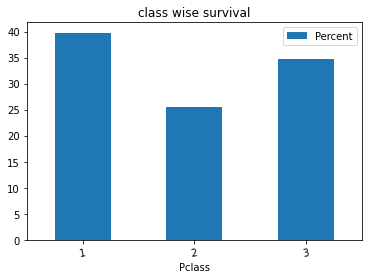

In [50]:
Class_survival.plot.bar(x="Pclass", y="Percent", rot=10, title="class wise survival")

plt.show(block=True)

People from first class of the ship succeeded in saving their lives the most.

In [51]:
dftrain.groupby(['Pclass'])['Survived'].value_counts(normalize=True)

Pclass  Survived
1       survived    0.629630
        dead        0.370370
2       dead        0.527174
        survived    0.472826
3       dead        0.757637
        survived    0.242363
Name: Survived, dtype: float64

From the statics its clear that 63% of passengers in 1st class survived, while 47% from 2nd class and only 24% from 3rd survived.

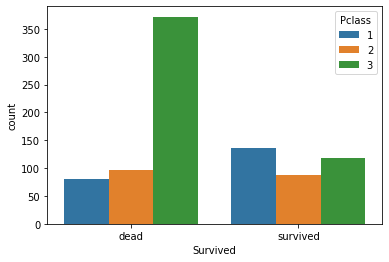

In [52]:
sns.countplot(x='Survived', hue='Pclass', data=dftrain)

Clearly most of the passengers who died were from 3rd class, there was a priority given to First class 1 passengers, and it shows prejudice here.

## PREDICTION

### KNN Model

In [53]:
dftrain["Survived"] =dftrain["Survived"].replace(["survived","dead"],["1", "0"])

dftrain["Sex"] =dftrain["Sex"].replace(["male","female"],["1", "0"])

In [54]:
X = dftrain[["PassengerId", "Pclass", "Sex", "Age", "Fare"]]
X[0:5]

,PassengerId,Pclass,Sex,Age,Fare
0,1,3,1,22.0,7.2500
1,2,1,0,38.0,71.2833
2,3,3,0,26.0,7.9250
3,4,1,0,35.0,53.1000
4,5,3,1,35.0,8.0500


In [55]:
y = dftrain['Survived'].values
y[0:5]

array(['0', '1', '1', '1', '0'], dtype=object)

In [56]:
from sklearn import preprocessing as pr
X= pr.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.73010796,  0.82737724,  0.73769513, -0.5924806 , -0.50244517],
       [-1.72622007, -1.56610693, -1.35557354,  0.63878901,  0.78684529],
       [-1.72233219,  0.82737724, -1.35557354, -0.2846632 , -0.48885426],
       [-1.71844431, -1.56610693, -1.35557354,  0.40792596,  0.42073024],
       [-1.71455642,  0.82737724,  0.73769513,  0.40792596, -0.48633742]])

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (757, 5) (757,)
Test set: (134, 5) (134,)


In [58]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8428005284015853
Test set Accuracy:  0.8731343283582089


In [59]:
dftest["Sex"] =dftest["Sex"].replace(["male","female"],["1", "0"])

In [60]:
Feature1=dftest[['PassengerId', "Pclass", "Sex", "Age", "Fare"]]

In [61]:
Feature1.dropna(subset=["Age","Fare"], inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
print("nan values in fare", Feature1["Fare"].isnull().sum())

nan values in fare 0


In [63]:
Feature2= pr.StandardScaler().fit(Feature1).transform(Feature1)
Feature2[0:5]

array([[-1.69675037,  1.01542612,  0.78901776,  0.30665727, -0.54228095],
       [-1.68860203,  1.01542612, -1.2673986 ,  1.19423645, -0.55584416],
       [-1.68045369, -0.16804587,  0.78901776,  2.25933148, -0.51188479],
       [-1.67230535,  1.01542612,  0.78901776, -0.22589024, -0.52865069],
       [-1.66415701,  1.01542612, -1.2673986 , -0.58092192, -0.46935665]])

In [64]:
X_test1=Feature2

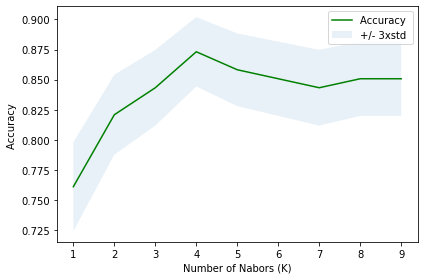

In [65]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks): 
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


In [66]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8731343283582089 with k= 4


### Decission Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
survivalTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
survivalTree.fit(X_train,y_train)
survivalTree 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [68]:
predTree = survivalTree.predict(X_test)
print (predTree [0:10])
print (y_test [0:10])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

['0' '0' '1' '1' '0' '0' '1' '1' '0' '0']
['0' '0' '1' '1' '0' '1' '1' '1' '0' '0']
DecisionTrees's Accuracy:  0.8582089552238806


### Support Vector Machine 

In [69]:
from sklearn import svm
SVM_classifier = svm.SVC()
SVM_classifier.fit(X_train, y_train) 

SVC()

In [70]:
svmyhat = SVM_classifier.predict(X_test)
print(y_test[0:10])
print(svmyhat[0:10])
print("SVM Accuracy: ", metrics.accuracy_score(y_test, svmyhat))

['0' '0' '1' '1' '0' '1' '1' '1' '0' '0']
['0' '0' '1' '1' '0' '0' '1' '0' '0' '0']
SVM Accuracy:  0.8432835820895522


### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [72]:
testyhat = LR.predict(X_test)
testyhat[0:5]

array(['0', '0', '1', '1', '0'], dtype=object)

In [73]:
print("LR Accuracy: ", metrics.accuracy_score(y_test, testyhat))

LR Accuracy:  0.8283582089552238


To show the probability of predictions.

In [74]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.73954658, 0.26045342],
       [0.73562824, 0.26437176],
       [0.4547886 , 0.5452114 ],
       [0.27206471, 0.72793529],
       [0.69905094, 0.30094906]])

In [75]:
rep = pd.DataFrame([], columns = ['Algorithm' , "Accuracy"]) 

rep   = rep.append(pd.Series(['KNN', metrics.accuracy_score(y_test, yhat)], index=rep.columns ), ignore_index=True)
rep   = rep.append(pd.Series(['Decision Tree', metrics.accuracy_score(y_test, predTree)], index=rep.columns ), ignore_index=True)
rep   = rep.append(pd.Series(['SVM', metrics.accuracy_score(y_test, svmyhat)], index=rep.columns ), ignore_index=True)
rep   = rep.append(pd.Series(['LogisticRegression', metrics.accuracy_score(y_test, testyhat)], index=rep.columns ), ignore_index=True)

rep.round(2)

,Algorithm,Accuracy
0,KNN,0.85
1,Decision Tree,0.86
2,SVM,0.84
3,LogisticRegression,0.83


Decision Tree is giving highest Accuracy

Prediction for test data set via decision Tree and KNN Model.

In [76]:
treeyhat = survivalTree.predict(X_test1)
treeyhat [0:5]

array(['0', '0', '0', '0', '1'], dtype=object)

In [77]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat1 = neigh.predict(X_test1)
yhat1[0:5]

array(['0', '0', '0', '0', '1'], dtype=object)

Prediction:

In [83]:
p1=pd.DataFrame( data= Feature1["PassengerId"], columns=["PassengerId"])
p2=pd.DataFrame(data= yhat1, columns=["Survived"])
#import sqlalchemy as sa
#engine = sa.create_engine('sqlite:///tmp.db')
#p1.to_sql('p1', engine)
#p2.to_sql('p2', engine)
#predict = pd.read_sql_query('SELECT * FROM p1 JOIN p2', engine)
#predict


In [82]:
#p1['tmp'] = 1
#p2['tmp'] = 1
#predict = pd.merge(p1, p2, on=['tmp'])
#predict.drop_duplicates(subset="PassengerId", inplace=True)
#predict = predict.drop('tmp', axis=1)
#predict

In [79]:
predict["Survived"].value_counts(normalize=True)

0    0.628399
1    0.371601
Name: Survived, dtype: float64